In [37]:
import re
import unicodedata
import pandas as pd
import nltk

import  matplotlib.pyplot as plt
from wordcloud import WordCloud

from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 1. Spam Data

#### a. Load the spam data set.

In [3]:
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [5]:
ADDITIONAL_STOPWORDS = []

ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

#### b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [52]:
spam_bigrams = nltk.ngrams(spam_words, 2)
ham_bigrams = nltk.ngrams(ham_words, 2)

In [33]:
ham_values = (pd.Series(ham_bigrams)).value_counts().to_dict().items()
spam_values = (pd.Series(spam_bigrams)).value_counts().to_dict().items()

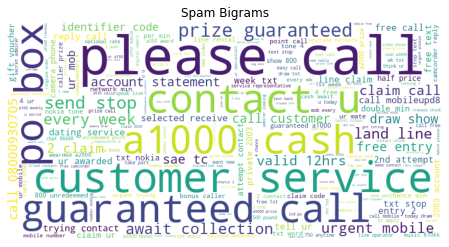

In [41]:
data = {k[0] + ' ' + k[1]: v for k, v in spam_values}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.title('Spam Bigrams')
plt.axis('off')
plt.show()

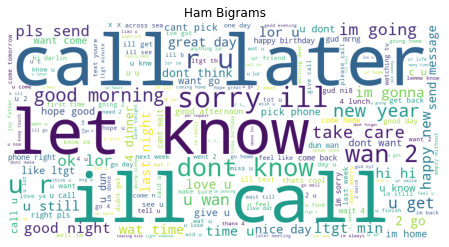

In [42]:
data = {k[0] + ' ' + k[1]: v for k, v in ham_values}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.title('Ham Bigrams')
plt.axis('off')
plt.show()

In [53]:
ham_series = pd.Series(ham_bigrams)
ham_series.value_counts().head(20)

(call, later)      52
(ill, call)        48
(let, know)        41
(sorry, ill)       39
(r, u)             37
(u, r)             33
(dont, know)       32
(wan, 2)           31
(good, morning)    31
(new, year)        30
(take, care)       26
(im, going)        24
(u, wan)           23
(u, get)           23
(ok, lor)          22
(pls, send)        22
(im, gonna)        20
(ltgt, min)        19
(good, night)      19
(happy, new)       19
dtype: int64

In [54]:
spam_series = pd.Series(spam_bigrams)
spam_series.value_counts().head(20)

(please, call)          44
(customer, service)     27
(contact, u)            24
(po, box)               24
(guaranteed, call)      23
(a1000, cash)           23
(prize, guaranteed)     22
(send, stop)            19
(every, week)           19
(await, collection)     19
(land, line)            18
(urgent, mobile)        18
(2, claim)              17
(valid, 12hrs)          17
(claim, call)           17
(account, statement)    16
(call, 08000930705)     16
(sae, tc)               16
(draw, show)            15
(call, customer)        15
dtype: int64

#### c. Is there any overlap in the bigrams for the spam data and the ham data?

In [55]:
overlapping = set(spam_series) & set(ham_series)
overlapping

{('2', 'c'),
 ('2', 'choose'),
 ('2', 'find'),
 ('2', 'get'),
 ('2', 'go'),
 ('2', 'join'),
 ('2', 'keep'),
 ('2', 'new'),
 ('2', 'play'),
 ('2', 'sort'),
 ('2', 'stop'),
 ('2', 'take'),
 ('2', 'u'),
 ('2', 'ur'),
 ('2', 'use'),
 ('2', 'work'),
 ('26th', 'july'),
 ('3', 'hour'),
 ('3', 'week'),
 ('4', '1'),
 ('4', 'free'),
 ('4', 'next'),
 ('4', 'u'),
 ('4', 'ur'),
 ('6', 'u'),
 ('babe', 'im'),
 ('babe', 'make'),
 ('babe', 'u'),
 ('baby', 'im'),
 ('back', '2'),
 ('back', 'id'),
 ('back', 'u'),
 ('bill', '3'),
 ('brand', 'new'),
 ('c', 'u'),
 ('call', '4'),
 ('call', 'back'),
 ('call', 'call'),
 ('call', 'cost'),
 ('call', 'free'),
 ('call', 'landline'),
 ('call', 'text'),
 ('call', 'u'),
 ('called', 'left'),
 ('cant', 'get'),
 ('chat', 'dont'),
 ('come', 'take'),
 ('contact', 'u'),
 ('could', 'meet'),
 ('couple', 'day'),
 ('customer', 'service'),
 ('day', 'fri'),
 ('day', 'get'),
 ('day', 'give'),
 ('day', 'send'),
 ('day', 'today'),
 ('dont', 'forget'),
 ('dont', 'know'),
 ('dont', 'l

There is some overlap, the set of tuples above shows bigrams that are present in both the spam and ham data.

#### d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [58]:
# Creating the trigrams list for both spam and ham
spam_trigrams = nltk.ngrams(spam_words, 3)
ham_trigrams = nltk.ngrams(ham_words, 3)


# Creating the value_counts of the trigrams for both spam and ham
ham_tri_values = (pd.Series(ham_trigrams)).value_counts().to_dict().items()
spam_tri_values = (pd.Series(spam_trigrams)).value_counts().to_dict().items()

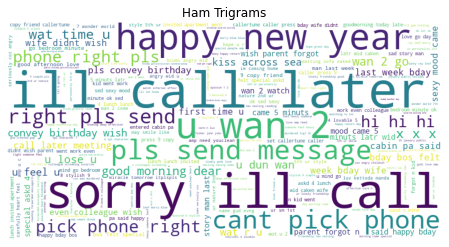

In [61]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in ham_tri_values}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.title('Ham Trigrams')
plt.axis('off')
plt.show()

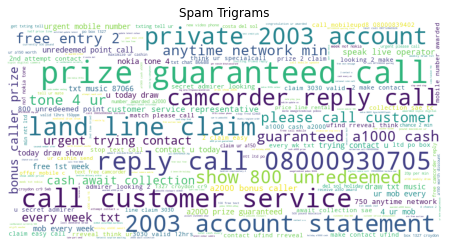

In [62]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in spam_tri_values}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.title('Spam Trigrams')
plt.axis('off')
plt.show()

In [70]:
overlapping_trigrams = set(pd.DataFrame(ham_tri_values)[0]) & set(pd.DataFrame(spam_tri_values)[0])
overlapping_trigrams

{('2', 'c', 'u'),
 ('called', 'left', 'message'),
 ('give', 'u', 'call'),
 ('new', 'year', 'eve'),
 ('number', 'im', 'glad'),
 ('please', 'call', 'back'),
 ('r', 'u', 'im'),
 ('sorry', 'missed', 'call'),
 ('u', 'dont', 'know'),
 ('u', 'get', 'u'),
 ('u', 'im', 'home'),
 ('u', 'wanna', 'cum')}

The above trigrams appear in both the ham and spam data.

## 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [72]:
import acquire
import prepare

In [76]:
blogs = acquire.get_all_codeup_blogs()

In [78]:
blogs = prepare.codeup_df_prepare()

In [80]:
blogs.head()

,title,original,clean,stemmed,lemmatized
0,In-Person Workshop: Learn to Code - Python on ...,In-Person Workshop: Learn to Code – Python on ...,inperson workshop learn code python 719 jun 20...,inperson workshop learn code python 719 jun 20...,inperson workshop learn code python 719 jun 20...
1,Free JavaScript Workshop at Codeup Dallas on 6...,Free JavaScript Workshop at Codeup Dallas on 6...,free javascript workshop codeup dallas 628 jun...,free javascript workshop codeup dalla 628 jun ...,free javascript workshop codeup dallas 628 jun...
2,Is Our Cloud Administration Program Right for ...,Is Our Cloud Administration Program Right for ...,cloud administration program right jun 8 2022 ...,cloud administr program right jun 8 2022 featu...,cloud administration program right jun 8 2022 ...
3,PRIDE in Tech Panel - Codeup,"PRIDE in Tech Panel\nJun 5, 2022 | Dallas, San...",pride tech panel jun 5 2022 dallas san antonio...,pride tech panel jun 5 2022 dalla san antonio ...,pride tech panel jun 5 2022 dallas san antonio...
4,Inclusion at Codeup During Pride Month (and Al...,Inclusion at Codeup During Pride Month (and Al...,inclusion codeup pride month always jun 1 2022...,inclus codeup pride month alway jun 1 2022 cod...,inclusion codeup pride month always jun 1 2022...


In [96]:
all_words = clean(' '.join(blogs.clean))

In [100]:
blogs_freq = pd.Series(all_words).value_counts()

<AxesSubplot:>

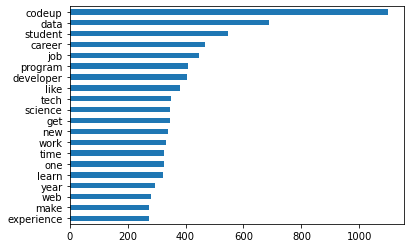

In [110]:
blogs_freq.head(20).sort_values().plot.barh()

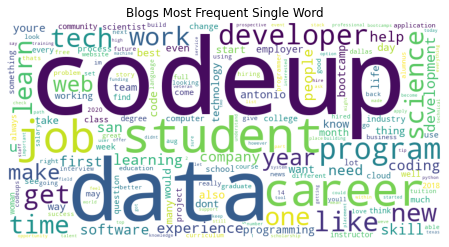

In [129]:
data = {k: v for k, v in blogs_freq.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Blogs Most Frequent Single Word')
plt.show()

In [123]:
blog_bigrams = nltk.ngrams(all_words, 2)

In [124]:
blog_bigrams = pd.Series(blog_bigrams).value_counts()
blog_bigrams

(data, science)          304
(san, antonio)           204
(data, scientist)        133
(web, development)       128
(software, developer)    107
                        ... 
(program, want)            1
(java, application)        1
(would, joining)           1
(sort, program)            1
(best, family)             1
Length: 53400, dtype: int64

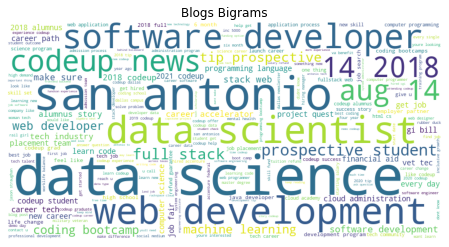

In [128]:
data = {k[0] + ' ' + k[1]: v for k, v in blog_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.title('Blogs Bigrams')
plt.axis('off')
plt.show()

<AxesSubplot:>

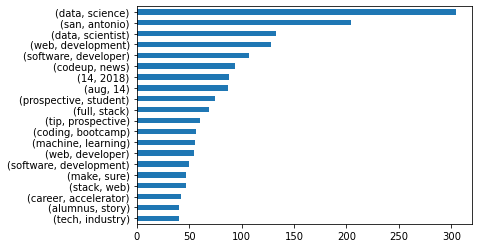

In [136]:
blog_bigrams.head(20).sort_values().plot.barh()

## 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [143]:
articles = acquire.get_all_inshorts_articles()
articles.head()

,title,content,category
0,"Rupee edges closer to 80 per US dollar, opens ...",The rupee on Friday opened at a record low of ...,business
1,Rupee drops 9 paise to close at all-time low o...,The rupee declined by 9 paise to close at a ne...,business
2,Musk accused lawyers of causing trouble by see...,"In its lawsuit against Tesla CEO Elon Musk, Tw...",business
3,No plans for company-wide layoffs: Twitter ami...,"In a filing, Twitter has said that it isn't lo...",business
4,Elon has a real record of success: LinkedIn Co...,LinkedIn's billionaire Co-founder Reid Hoffman...,business


In [152]:
category = pd.concat([articles.category.value_counts(),
                    articles.category.value_counts(normalize=True)], axis=1)
category.columns = ['n', 'percent']
category

,n,percent
business,25,0.25
technology,25,0.25
entertainment,25,0.25
sports,25,0.25


In [153]:
all_words = clean(' '.join(articles.content))
business_words = clean(' '.join(articles[articles.category == 'business'].content))
technology_words = clean(' '.join(articles[articles.category == 'technology'].content))
entertainment_words = clean(' '.join(articles[articles.category == 'entertainment'].content))
sports_words = clean(' '.join(articles[articles.category == 'sports'].content))

#### Looking at all words first before dividing by category

In [154]:
articles_freq = pd.Series(all_words).value_counts()

<AxesSubplot:>

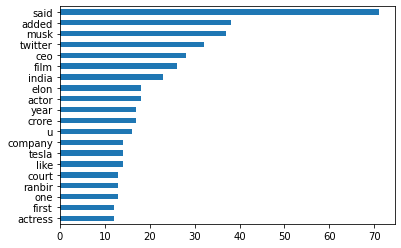

In [155]:
articles_freq.head(20).sort_values().plot.barh()

In [156]:
articles_bigrams = nltk.ngrams(all_words, 2)
articles_bigrams = pd.Series(articles_bigrams).value_counts()
articles_bigrams

(elon, musk)              18
(ceo, elon)               15
(tesla, ceo)              14
(44, billion)              9
(ceo, parag)               6
                          ..
(indian, badminton)        1
(sebi, ordered)            1
(previously, welcomed)     1
(26, apriljune)            1
(got, chance)              1
Length: 3090, dtype: int64

In [157]:
articles_trigrams = nltk.ngrams(all_words, 3)
articles_trigrams = pd.Series(articles_trigrams).value_counts()
articles_trigrams

(ceo, elon, musk)                      15
(tesla, ceo, elon)                     14
(lawsuit, tesla, ceo)                   5
(ceo, parag, agrawal)                   4
(musk, violating, 44)                   4
                                       ..
(2019, kohli, scored)                   1
(dollar, cheaper, option)               1
(information, mechanism, mechanism)     1
(one, storyi, knew)                     1
(go, hide, ironic)                      1
Length: 3261, dtype: int64

#### Looking at business category words

<AxesSubplot:>

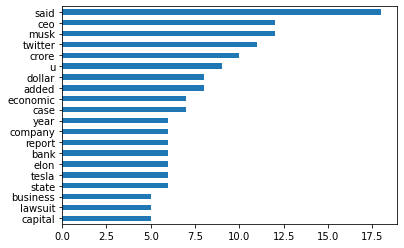

In [158]:
business_words_freq = pd.Series(business_words).value_counts()
business_words_freq.head(20).sort_values().plot.barh()

In [159]:
business_bigrams = nltk.ngrams(business_words, 2)
business_bigrams = pd.Series(business_bigrams).value_counts()
business_bigrams

(ceo, elon)          6
(elon, musk)         6
(tesla, ceo)         6
(u, dollar)          5
(lakh, crore)        4
                    ..
(amid, uncertain)    1
(fund, holding)      1
(exchange, march)    1
(cover, area)        1
(stated, indian)     1
Length: 844, dtype: int64

#### Looking at technology category words

<AxesSubplot:>

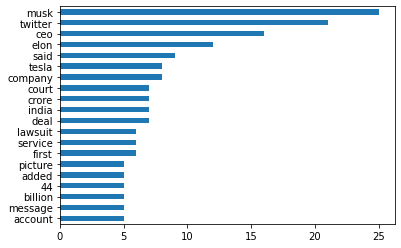

In [160]:
technology_words_freq = pd.Series(technology_words).value_counts()
technology_words_freq.head(20).sort_values().plot.barh()

In [162]:
technology_bigrams = nltk.ngrams(technology_words, 2)
technology_bigrams = pd.Series(technology_bigrams).value_counts()
technology_bigrams

(elon, musk)           12
(ceo, elon)             9
(tesla, ceo)            8
(44, billion)           5
(ceo, parag)            3
                       ..
(twitter, business)     1
(network, reliance)     1
(picture, shared)       1
(source, news)          1
(order, provide)        1
Length: 841, dtype: int64

#### Looking at technology category words

<AxesSubplot:>

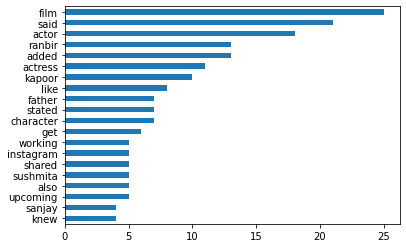

In [163]:
entertainment_words_freq = pd.Series(entertainment_words).value_counts()
entertainment_words_freq.head(20).sort_values().plot.barh()

In [164]:
entertainment_bigrams = nltk.ngrams(entertainment_words, 2)
entertainment_bigrams = pd.Series(entertainment_bigrams).value_counts()
entertainment_bigrams

(ranbir, kapoor)      6
(kapoor, said)        6
(upcoming, film)      4
(actor, ranbir)       3
(pyaar, ka)           2
                     ..
(doesnt, bother)      1
(punchnama, pyaar)    1
(sunny, deol)         1
(film, actress)       1
(high, court)         1
Length: 831, dtype: int64

#### Looking at technology category words

<AxesSubplot:>

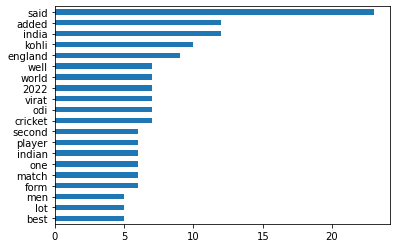

In [165]:
sports_words_freq = pd.Series(sports_words).value_counts()
sports_words_freq.head(20).sort_values().plot.barh()

In [166]:
sports_bigrams = nltk.ngrams(sports_words, 2)
sports_bigrams = pd.Series(sports_bigrams).value_counts()
sports_bigrams

(virat, kohli)        4
(second, odi)         4
(world, number)       4
(woman, single)       3
(kohli, scored)       3
                     ..
(scored, 2537)        1
(shot, rohit)         1
(kent, county)        1
(im, glad)            1
(griner, detained)    1
Length: 889, dtype: int64